# Workshop #1 

## The aim of this worksop is to make you manipulate 2 famous unsupervised Learning method in order to get insight in data which are clustering and PCA

### Clustering
In machine learning too, we often group examples as a first step to understand a subject (data set) in a machine learning system.

Some common applications for clustering include the following:

- market segmentation
- social network analysis
- search result grouping
- medical imaging
- image segmentation
- anomaly detection

We can also use Clusters for supervised Learning. In fact, we can perform regression (or classification) in each cluster where we know that observations are similar.

To perform a clustering, it is better to scale your data in order to have reliable cluter.

Many clustering algorithms exist but here we will use 2:
- Kmeans clustering
- Hierarchical clustering

#### Kmeans clustering
Kmeans clustering try to build groups using 2 main step after chosing the number of cluster:
- Choose the centers of clusters which will initially form cluster
- add each point to the closest cluster ( eachtime a point is added, it computes the gravity center ofthe cluster)

#### Hierarchical clustering
Hierarchical clustering is a simple but effective algorithm but has one "big" disadvantage, its time complexity. In fact, hierarchical clustering build cluster buy computing the distance between all points 2 by 2 and then assemble points that are closer. It will do it successively until we obtain the number of cluster we need.

We will illustrate this by applying these algorithms on real data



#### You can find below the first clustering tips&tricks slide on clustering

![title](img/clus1.png)

#### For this first clustering analysis, we will use a city dataset. The dataset gives temperature information of Frances big cities by month. Each row is a city and each column is a month. The goal is to apply clustering on this dataset to find groups of city that are similar.

### Import the data set and check how it is built. Store numerical data and non-numerical data in two differents variable.

In [1]:
#answer here

In [2]:
import pandas as pd
city = pd.read_csv('villes.csv',sep=';')
city.head()

cities = city.ville
temp = city.drop('ville',axis=1)

#### Before applying a clustering, we usually need to scale our data. Here, you can apply clustering without scaling the data as each column has already the same scale and unit. But as a training, we will do it anyway.

### Scaling

#### To scale the data we acan use two differents methods which are StandardScaler and MinMaxScaler. You will see the differences in next data science tips&tricks. 

### Scale the data

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_norm = sc.fit_transform(temp)

In [4]:
#answer here

### Apply the kmeans with a random k and evaluate it using silhouette

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
KM = KMeans(n_clusters = 3)
KM.fit(X_norm)
clus = KM.labels_

In [6]:
#answer here

### Now that we computed the clustering, we need to vizualize

#### After doing our clustering, we want to to vizualize it in order to check if the algorithm have been able to seperate ou observations. As we have more than 2 columns, it is hard to know which one to use, thus, we will apply a PCA and take the first components as axis for the plot. 

#### Apply a pca and take at least 2 components, plot the components and set each points color according to its cluster and display the name of the point(city)

C:\Users\yazaror\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


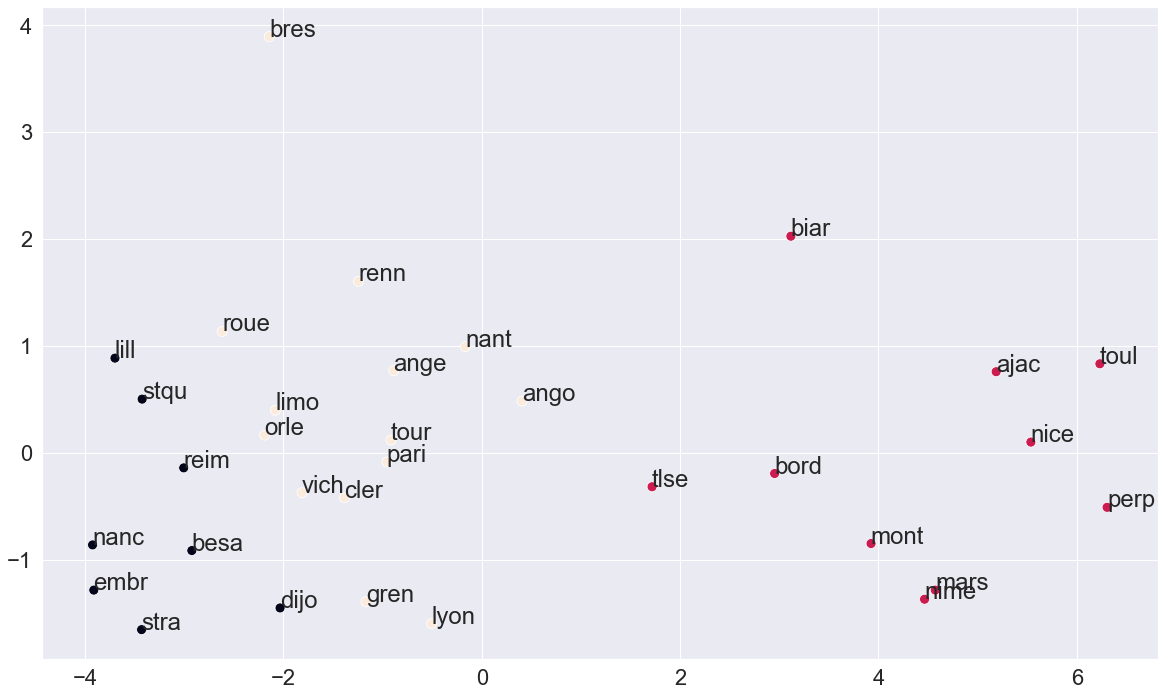

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X_pca = pca.fit_transform(X_norm)

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sb
sb.set(font_scale=2)

f = plt.subplots(figsize=(20,12))
sb.scatterplot(X_pca[:, 0], X_pca[:, 1], c= clus, s=100)
for label, x, y in zip(cities, X_pca[:, 0], X_pca[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()
#We clearly see the 3 clusters bu we can also see that there are at least 2 outliers that we will try to determine with DBSCAN

In [8]:
#answer here

### We can now try to create clusters using AgglomerativeClustering

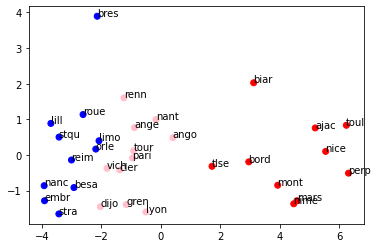

In [11]:
from sklearn.cluster import AgglomerativeClustering
AC = AgglomerativeClustering(n_clusters = 3)
AC.fit(X_norm)
clus = AC.labels_
silhouette_score(X_norm,clus)

colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clus, cmap=ListedColormap(colors))
for label, x, y in zip(cities, X_pca[:, 0], X_pca[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

### Let's try to indentify ouliters with DBSCAN now
#### Don't hesitate to change min_samples and eps features of DB scan to identify the two outliers (bres and biar)

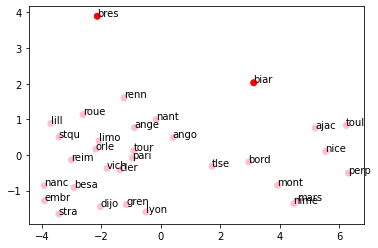

In [10]:
from sklearn.cluster import DBSCAN
DB = DBSCAN(min_samples=2,eps=2)
DB.fit(X_norm)
clus = DB.labels_

colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clus, cmap=ListedColormap(colors))
for label, x, y in zip(cities, X_pca[:, 0], X_pca[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

### Let's now try to interpret clusters obtained with kmeans
#### To do so, we will use the logistic regression to fit a classification considering our clusters as target

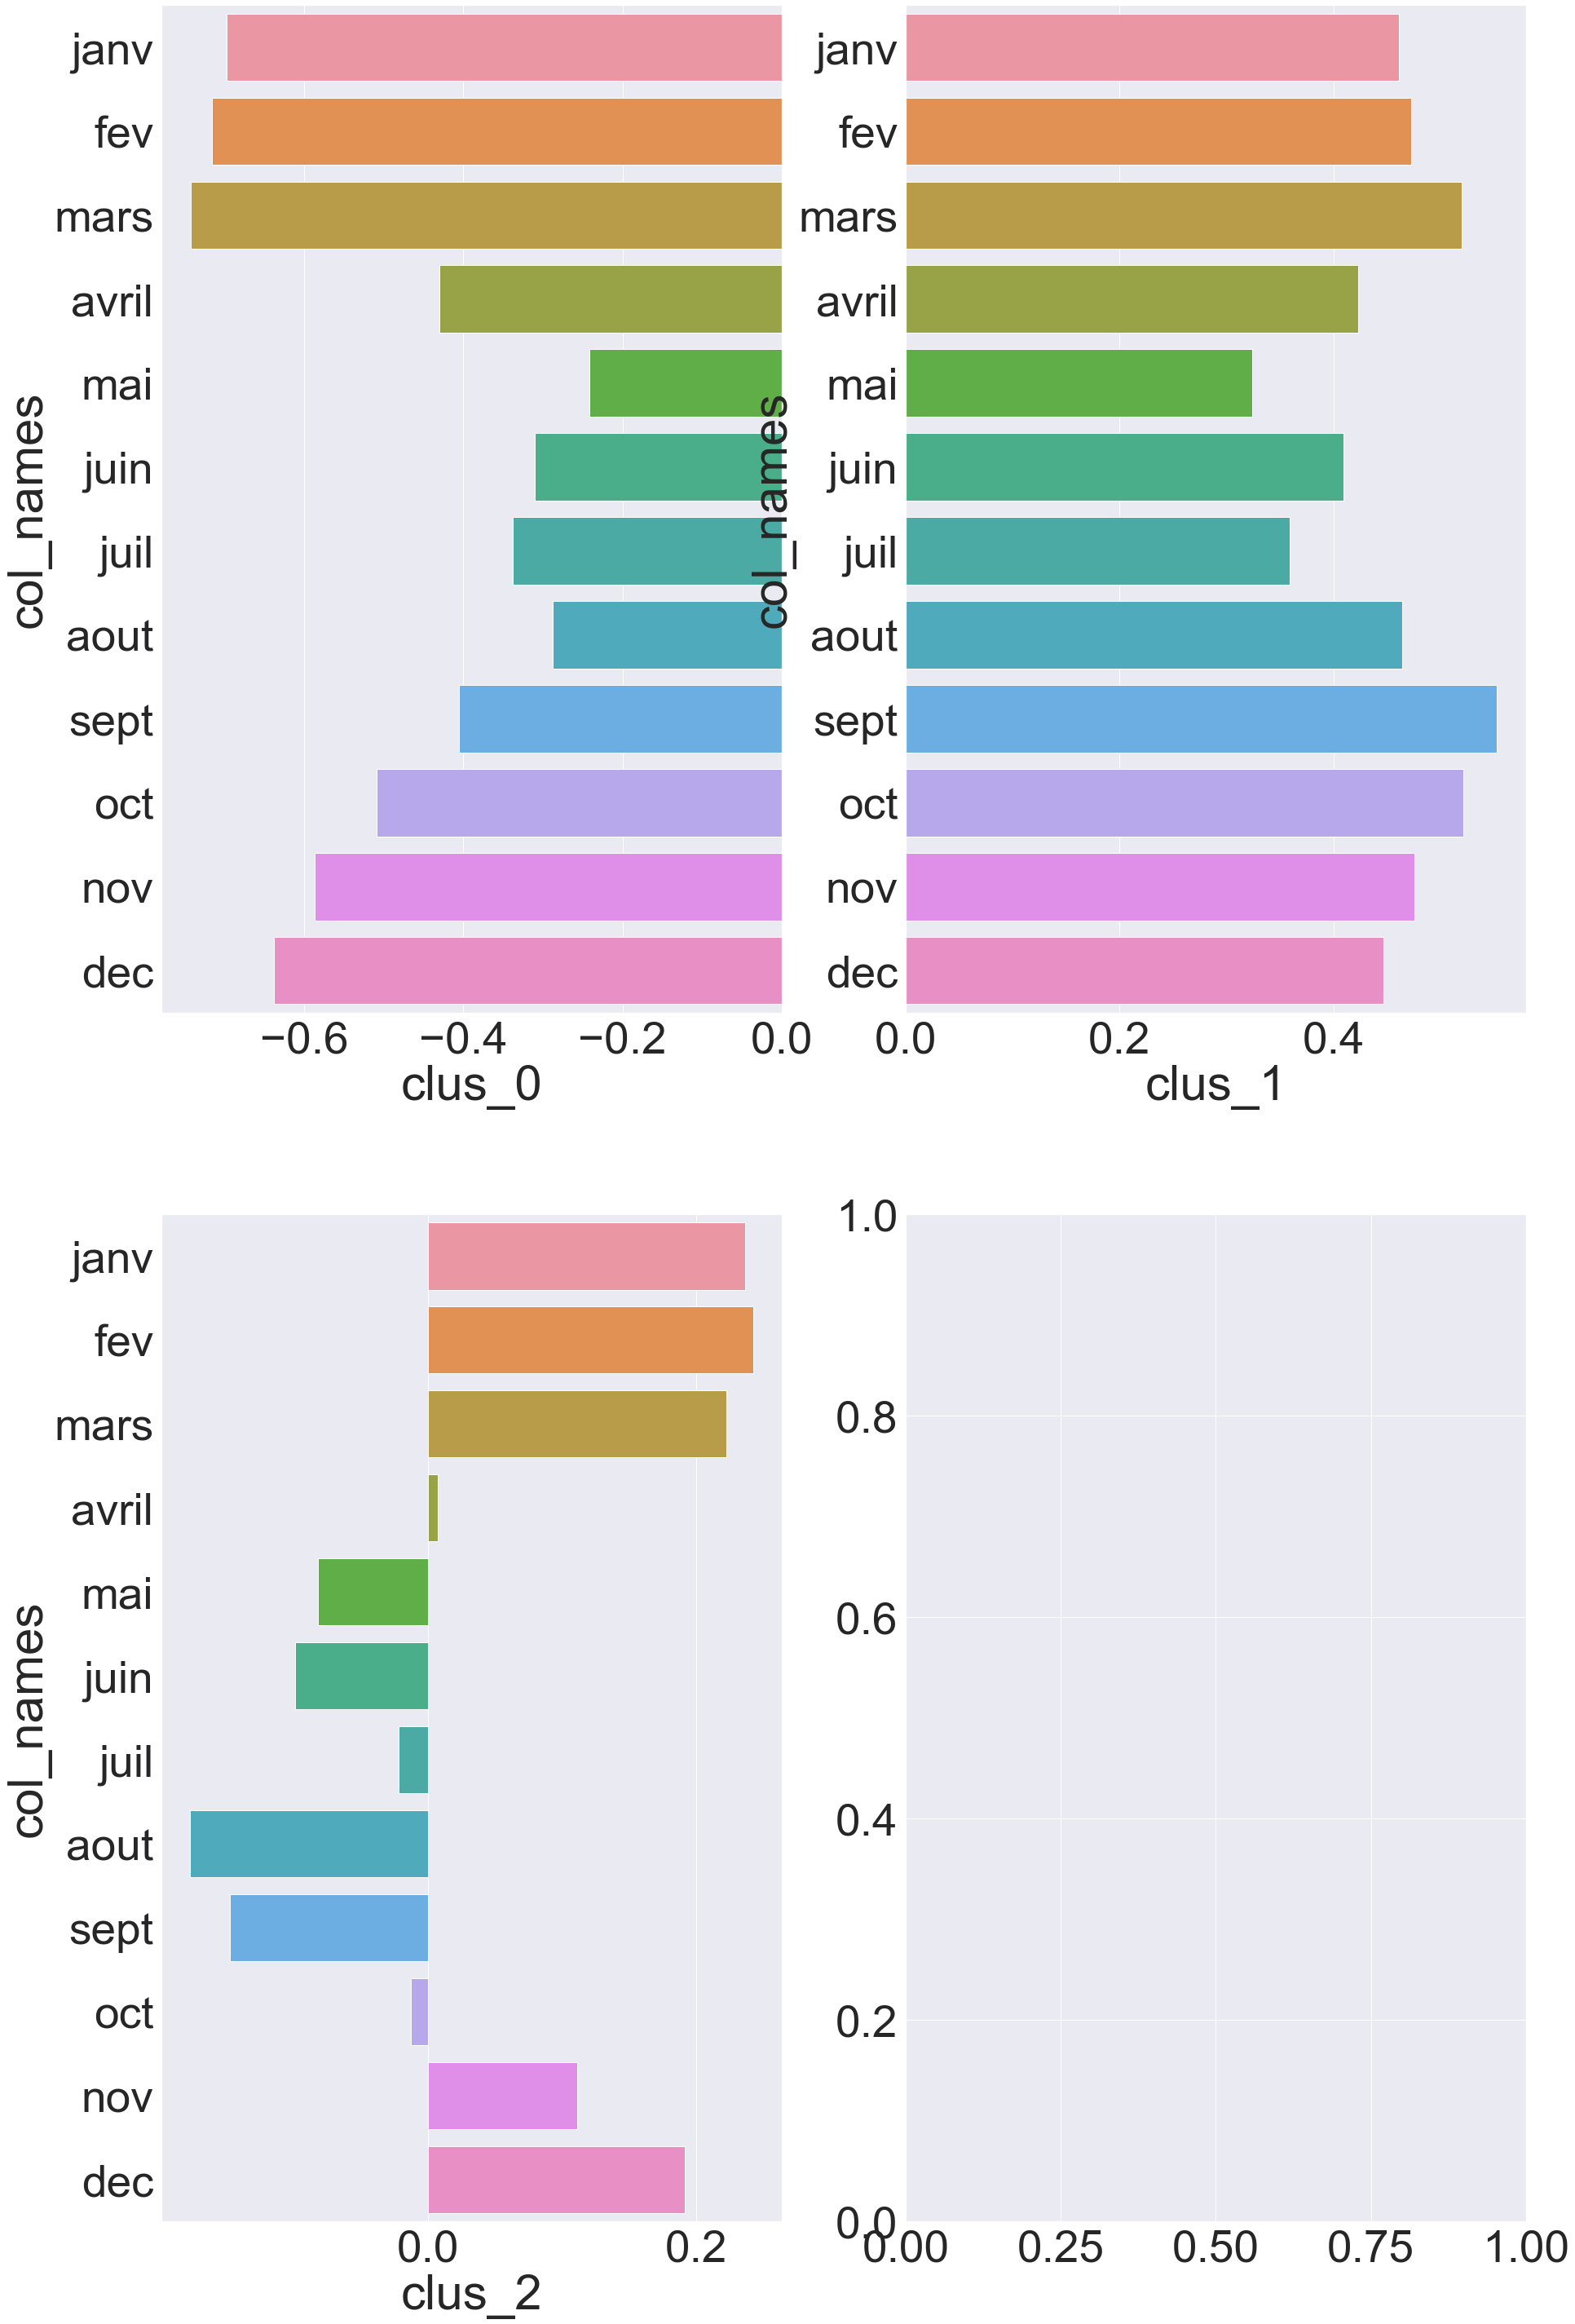

In [13]:
#We apply Kmeans
KM = KMeans(n_clusters = 3)
KM.fit(X_norm)
y = KM.labels_

#We apply the logistic regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(penalty='l2')
LR.fit(X_norm,y)

#We vizualize our coefficients
import numpy as np
df_clusInter = pd.DataFrame(np.concatenate((city.columns.values.reshape(-1,1)[1:], LR.coef_.T),axis=1), 
                            columns=['col_names', 'clus_0', 'clus_1', 'clus_2'])

import seaborn as sb
x_ax = 'col_names'
f, axes = plt.subplots(2,2,figsize=(30,50))
for i, ax in zip(range(0,3), axes.flat):
    sb.set(font_scale=5)
    sb.barplot(y=x_ax, x=df_clusInter.columns[1:].tolist()[i], data=df_clusInter,ax=ax)
    sb.set(font_scale=5)
plt.show()

#What we see is that in the first cluster we have cold cities, in the second we have hot cities and in the last one the others 
# which are the averages cities

#### Now that we interpreted, we can check for more information about clusters. Here we can check the average temp by month in each clusters

In [22]:
city['cluster'] = y
city.groupby('cluster').mean()

,janv,fev,mars,avril,mai,juin,juil,aout,sept,oct,nov,dec
cluster,,,,,,,,,,,,
0,1.300000,2.2625,6.075000,9.450000,13.325000,16.500000,18.412500,18.00,15.162500,10.137500,5.55,2.162500
1,6.600000,7.5000,10.410000,12.840000,16.130000,19.870000,22.220000,22.02,19.590000,15.080000,10.60,7.500000
2,3.528571,4.3000,7.664286,10.285714,13.664286,16.907143,18.757143,18.45,15.978571,11.478571,7.25,4.342857


In [20]:
city.loc[city['cluster']==0,"cluster"] = 'cold_city'
city.loc[city['cluster']==1,"cluster"] = 'hot_city'
city.loc[city['cluster']==2,"cluster"] = 'average_city'
city

,ville,janv,fev,mars,avril,mai,juin,juil,aout,sept,oct,nov,dec,cluster
0,ajac,7.7,8.7,10.5,12.6,15.9,19.8,22.0,22.2,20.3,16.3,11.8,8.7,hot_city
1,ange,4.2,4.9,7.9,10.4,13.6,17.0,18.7,18.4,16.1,11.7,7.6,4.9,average_city
2,ango,4.6,5.4,8.9,11.3,14.5,17.2,19.5,19.4,16.9,12.5,8.1,5.3,average_city
3,besa,1.1,2.2,6.4,9.7,13.6,16.9,18.7,18.3,15.5,10.4,5.7,2.0,cold_city
4,biar,7.6,8.0,10.8,12.0,14.7,17.8,19.7,19.9,18.5,14.8,10.9,8.2,hot_city
5,bord,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2,hot_city
6,bres,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,average_city
7,cler,2.6,3.7,7.5,10.3,13.8,17.3,19.4,19.1,16.2,11.2,6.6,3.6,average_city
8,dijo,1.3,2.6,6.9,10.4,14.3,17.7,19.6,19.0,15.9,10.5,5.7,2.1,cold_city
9,embr,0.5,1.6,5.7,9.0,13.0,16.4,18.9,18.3,15.3,10.1,4.6,0.5,cold_city


In [ ]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
#             fig, ax = plt.subplots(figsize=(7,6))
            fig,ax=plt.subplots(figsize=(20,20))
            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))